In [32]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import keras                    # Нейронные сети
#import LightFM                  #рекомендации + фичи

In [33]:
# функция загрузки и вывода основной информации о данных
def data_load(path_serv):
    df = pd.read_csv(path_serv,  sep='\t')
    display(df.head())
    display(df.info())
    display(df.describe(include='all'))
    display(df.nunique())
    display(df.isna().sum())
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    return df

In [34]:
cosmetic_train = data_load("C:\\Users\\trosh\\Projects\\Python3\\vscode\\cosmetic_train.tsv")

,device_id,receipt_id,item_id,local_date,name,price,quantity
0,356645110209741,14109912085,200151,2023-02-14 19:29:05,Коробка подарочная A MILLION KISSES,0.0,1
1,356645110209741,14118224448,200222,2023-02-15 16:55:40,"Крем-баттер для тела Франжипани-Монои, 200 мл",1290.0,1
2,356645110209741,14118224448,200521,2023-02-15 16:55:40,"Скраб для тела SAKURA, 250 гр",1390.0,1
3,356645110209741,14118224448,200282,2023-02-15 16:55:40,"Массажное масло от растяжек MIRACLE OIL,150 мл",1290.0,1
4,356645110209741,14118224448,200136,2023-02-15 16:55:40,"Консилер Liquid camouflage, тон light 10мл.",1390.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223908 entries, 0 to 223907
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   device_id   223908 non-null  int64  
 1   receipt_id  223908 non-null  int64  
 2   item_id     223908 non-null  int64  
 3   local_date  223908 non-null  object 
 4   name        223908 non-null  object 
 5   price       223908 non-null  float64
 6   quantity    223908 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 12.0+ MB


None

,device_id,receipt_id,item_id,local_date,name,price,quantity
count,2.239080e+05,2.239080e+05,223908.000000,223908,223908,223908.000000,223908.000000
unique,NaN,NaN,NaN,68155,667,NaN,NaN
top,NaN,NaN,NaN,2022-11-24 15:40:18,"Крем-баттер для тела Манго-Маракуйя, 200 мл",NaN,NaN
freq,NaN,NaN,NaN,49,4249,NaN,NaN
mean,3.550854e+14,1.262822e+10,200346.067144,NaN,NaN,834.758242,1.085240
std,2.047298e+12,2.049985e+09,196.111320,NaN,NaN,549.038193,1.159665
min,3.523981e+14,9.127896e+09,200000.000000,NaN,NaN,0.000000,1.000000
25%,3.523981e+14,1.077308e+10,200200.000000,NaN,NaN,399.000000,1.000000
50%,3.566451e+14,1.285266e+10,200332.000000,NaN,NaN,990.000000,1.000000
75%,3.566451e+14,1.423237e+10,200529.000000,NaN,NaN,1190.000000,1.000000


device_id        30
receipt_id    68283
item_id         667
local_date    68155
name            667
price          2133
quantity         20
dtype: int64

device_id     0
receipt_id    0
item_id       0
local_date    0
name          0
price         0
quantity      0
dtype: int64

Количество дубликатов: 2


In [35]:
cosmetic_train = cosmetic_train.drop_duplicates()

In [36]:
cosmetic_train['quantity'] = cosmetic_train['quantity'].astype('int8')

In [37]:
cosmetic_train['local_date'] = pd.to_datetime(cosmetic_train['local_date'], format='%Y-%m-%d %H:%M:%S')

In [38]:
cosmetic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223906 entries, 0 to 223907
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   device_id   223906 non-null  int64         
 1   receipt_id  223906 non-null  int64         
 2   item_id     223906 non-null  int64         
 3   local_date  223906 non-null  datetime64[ns]
 4   name        223906 non-null  object        
 5   price       223906 non-null  float64       
 6   quantity    223906 non-null  int8          
dtypes: datetime64[ns](1), float64(1), int64(3), int8(1), object(1)
memory usage: 12.2+ MB


In [39]:
supermarket_train = data_load("C:\\Users\\trosh\\Projects\\Python3\\vscode\\supermarket_train.tsv")

,device_id,receipt_id,item_id,server_date,local_date,name,price,quantity,my_ckecker
0,352398080550058,13014665572,104821,2022-10-16 14:38:00,2022-10-16 14:38:01,Картофель /новый урожай/Россия/,31.9,28.45,NaN
1,352398080550058,13014665572,107726,2022-10-16 14:38:00,2022-10-16 14:38:01,Молоко Станичное 3.2% 1.0л ультрапастеризованн...,89.0,1.00,NaN
2,352398080550058,13014716101,100671,2022-10-16 14:42:06,2022-10-16 14:42:06,Вафли Коламбина /телевизор/Кузнецов/,367.0,2.00,NaN
3,352398080550058,13014716101,104645,2022-10-16 14:42:06,2022-10-16 14:42:06,К-ты Хо-хо-чу глаз.солен.карамель /Невск.конди...,334.0,1.00,NaN
4,352398080550058,13015069818,107708,2022-10-16 15:11:39,2022-10-16 15:11:39,Молоко Молочный гостинец 3.2% 930гр ультрапаст...,89.0,1.00,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696787 entries, 0 to 696786
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   device_id    696787 non-null  int64  
 1   receipt_id   696787 non-null  int64  
 2   item_id      696787 non-null  int64  
 3   server_date  696787 non-null  object 
 4   local_date   696787 non-null  object 
 5   name         696787 non-null  object 
 6   price        696787 non-null  float64
 7   quantity     696787 non-null  float64
 8   my_ckecker   0 non-null       float64
dtypes: float64(3), int64(3), object(3)
memory usage: 47.8+ MB


None

,device_id,receipt_id,item_id,server_date,local_date,name,price,quantity,my_ckecker
count,6.967870e+05,6.967870e+05,696787.000000,696787,696787,696787,696787.000000,696787.000000,0.0
unique,NaN,NaN,NaN,161969,162833,16226,NaN,NaN,NaN
top,NaN,NaN,NaN,2021-11-03 10:25:29,2022-04-22 18:48:31,Хлеб Дарницкий 600гр /Пореченский х/з/,NaN,NaN,NaN
freq,NaN,NaN,NaN,128,42,18780,NaN,NaN,NaN
mean,3.523981e+14,1.254556e+10,108852.321336,NaN,NaN,NaN,118.420738,1.272593,NaN
std,6.482178e+05,2.048410e+09,5127.736083,NaN,NaN,NaN,125.143762,2.040548,NaN
min,3.523981e+14,9.127015e+09,100000.000000,NaN,NaN,NaN,0.410000,0.001000,NaN
25%,3.523981e+14,1.079964e+10,104978.000000,NaN,NaN,NaN,39.500000,1.000000,NaN
50%,3.523981e+14,1.240296e+10,108918.000000,NaN,NaN,NaN,74.000000,1.000000,NaN
75%,3.523981e+14,1.434212e+10,113611.000000,NaN,NaN,NaN,150.000000,1.000000,NaN


device_id          25
receipt_id     163296
item_id         16226
server_date    161969
local_date     162833
name            16226
price            6651
quantity         3666
my_ckecker          0
dtype: int64

device_id           0
receipt_id          0
item_id             0
server_date         0
local_date          0
name                0
price               0
quantity            0
my_ckecker     696787
dtype: int64

Количество дубликатов: 25682


In [40]:
supermarket_train = supermarket_train.drop_duplicates()

In [41]:
supermarket_train.columns

Index(['device_id', 'receipt_id', 'item_id', 'server_date', 'local_date',
       'name', 'price', 'quantity', 'my_ckecker'],
      dtype='object')

In [42]:
supermarket_train['local_date'] = pd.to_datetime(supermarket_train['local_date'], format='%Y-%m-%d %H:%M:%S')
supermarket_train['server_date'] = pd.to_datetime(supermarket_train['server_date'], format='%Y-%m-%d %H:%M:%S')

In [43]:
supermarket_train = supermarket_train.drop('my_ckecker', axis=1)

In [44]:
supermarket_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671105 entries, 0 to 696786
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   device_id    671105 non-null  int64         
 1   receipt_id   671105 non-null  int64         
 2   item_id      671105 non-null  int64         
 3   server_date  671105 non-null  datetime64[ns]
 4   local_date   671105 non-null  datetime64[ns]
 5   name         671105 non-null  object        
 6   price        671105 non-null  float64       
 7   quantity     671105 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 46.1+ MB


In [45]:
def charts(df, col=None):
    if col is None:
        col = df.columns
    for i in col:
        f, axes = plt.subplots(1, 2, figsize=(17,5))
        axes[0].set_title(f'Гистограмма по {i}', fontsize=15)
        axes[0].set(xlabel=i, ylabel='Количество')
        axes[1].set_title(f'Диаграмма размаха по {i}', fontsize=15)
        sns.histplot(df[i], kde=True, bins=50, ax=axes[0])
        axes[0].grid() 
        sns.boxplot(x=df[i], ax=axes[1])
        plt.grid()
        plt.show()

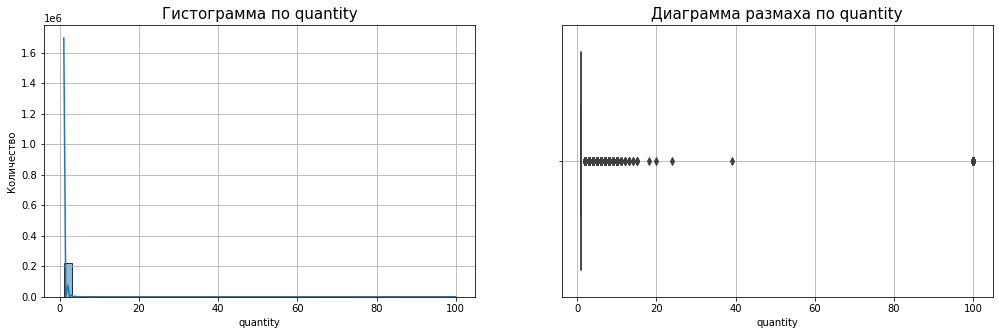

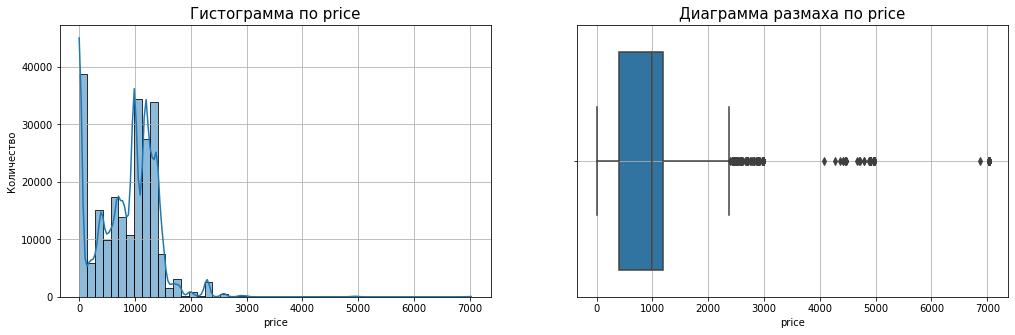

In [46]:
charts(cosmetic_train, ['quantity', 'price'])

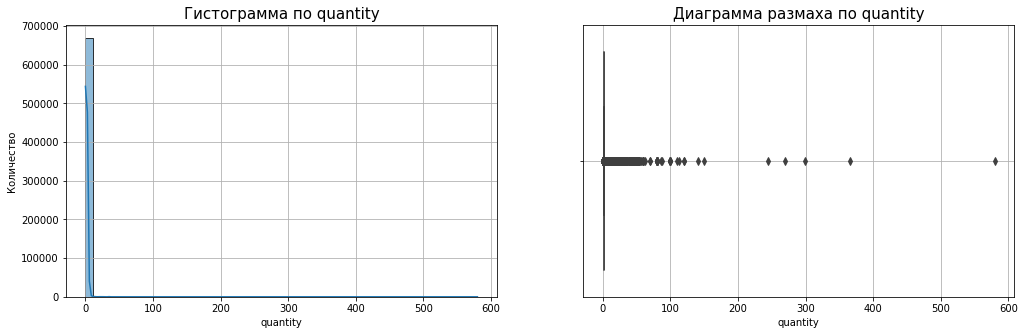

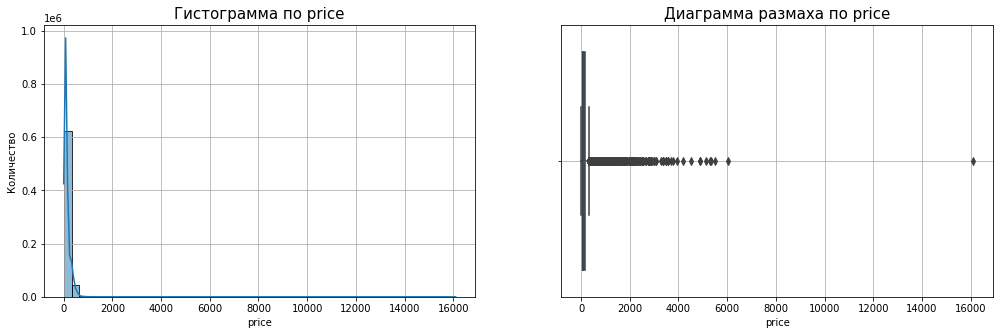

In [47]:
charts(supermarket_train, ['quantity', 'price'])